<a href="https://colab.research.google.com/github/saanvi2725/SCT_DS_2/blob/main/SCT_DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('tested.csv')

Data Preview

In [2]:
# Preview the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Checking the Structure

In [3]:
# Check shape
print("Dataset Shape:", df.shape)

Dataset Shape: (418, 12)


In [4]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Check missing values

In [5]:
# Total missing values per column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


Handling missing values

In [7]:
#age
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [8]:
#fare
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [9]:
#cabin
df.drop(columns='Cabin', inplace=True)

In [10]:
#recheck missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Visualizations (Univariate Analysis: one variable at a time)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

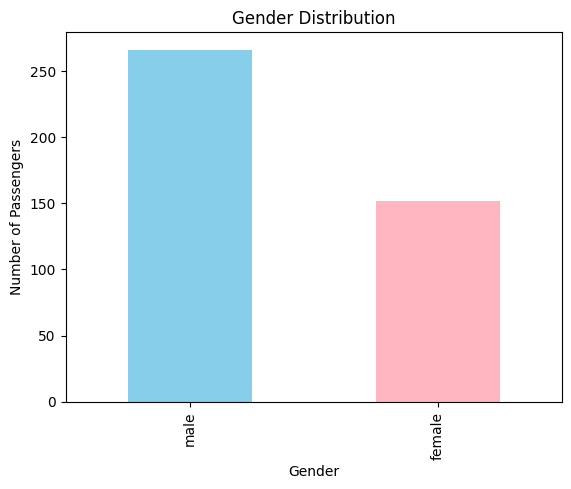

In [13]:
# Bar chart for gender
gender_counts = df['Sex'].value_counts()
gender_counts.plot.bar(color=['skyblue', 'lightpink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

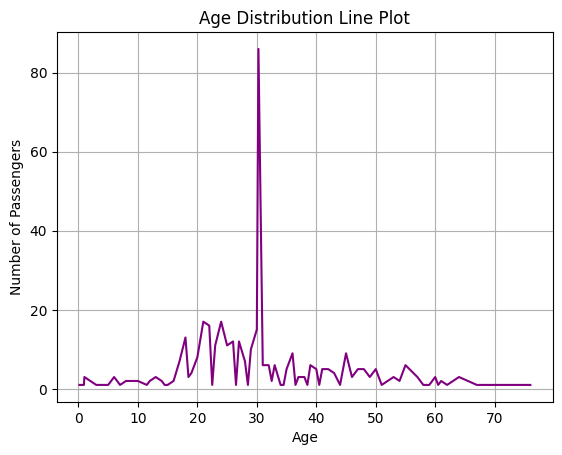

In [14]:
# Line plot of age distribution
df['Age'].value_counts().sort_index().plot.line(color='purple')
plt.title('Age Distribution Line Plot')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


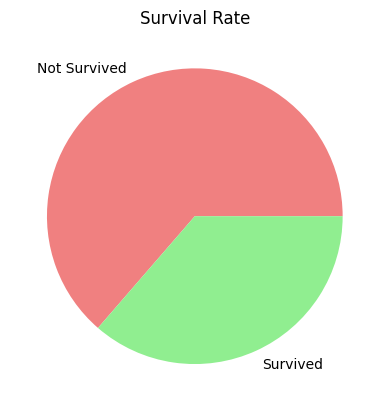

In [15]:
# Pie chart for survival
df['Survived'].value_counts().plot.pie(labels=['Not Survived', 'Survived'],colors=['lightcoral', 'lightgreen'],)
plt.title('Survival Rate')
plt.ylabel('')
plt.show()


Bivariate Analysis: compare two variables to understand how one affects the other

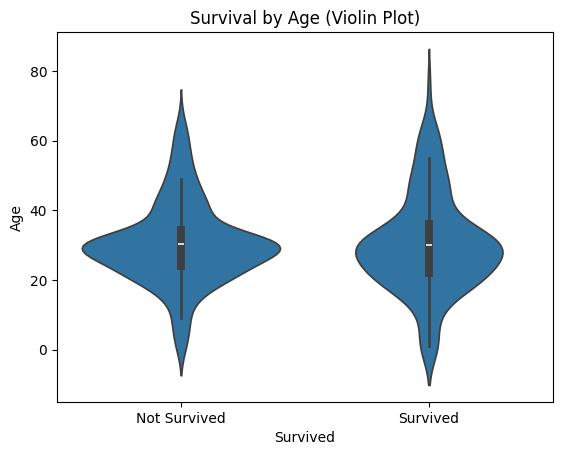

In [19]:
#let us consider survival as target and how it is affected by age, class and gender

#survival and age
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Survival by Age (Violin Plot)')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


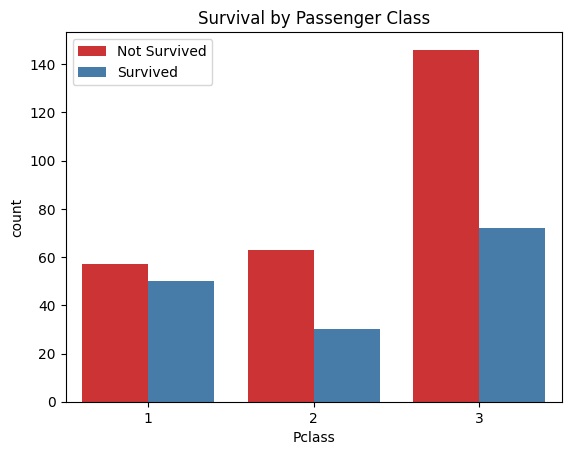

In [20]:
#survival and class
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Passenger Class')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()


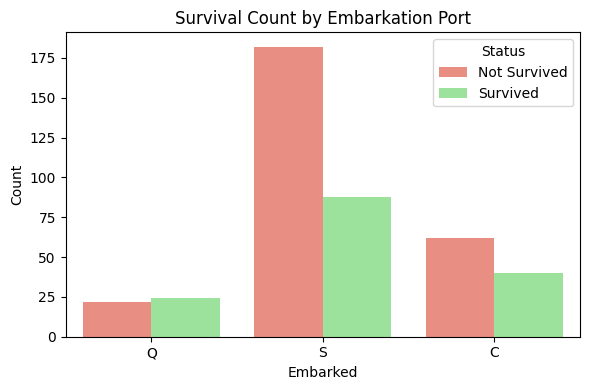

In [32]:
#survival and location
df['Survival_Status'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked', hue='Survival_Status', palette=['salmon', 'lightgreen'])
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


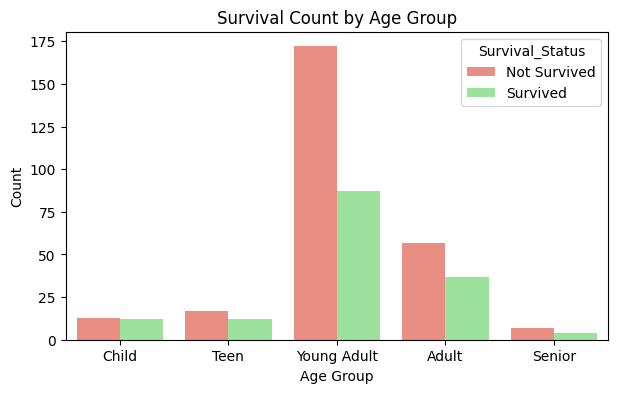

In [34]:
#age group binning
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='AgeGroup', hue='Survival_Status', palette=['salmon', 'lightgreen'])
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


Correlation Heatmap

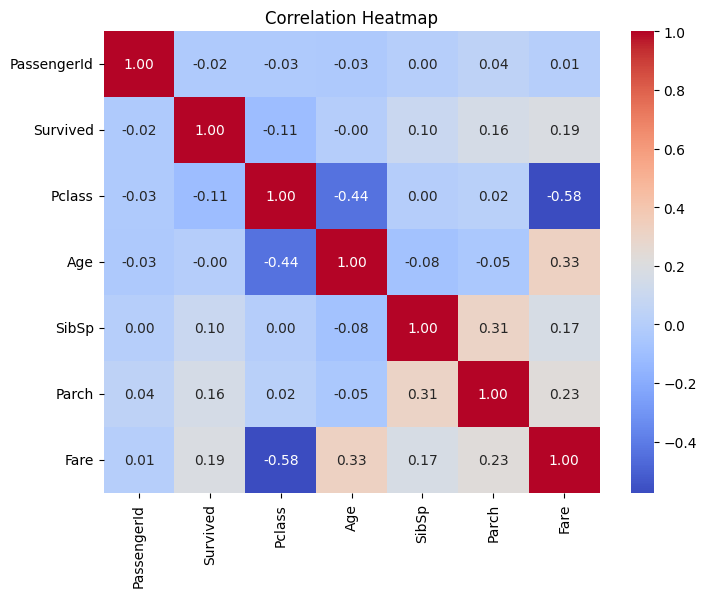

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
